# Aplicación de un modelo LSTM (keras) en la demanda de energía de España

Este es un ejercicio de aplicación de un modelo de redes neuronales Long Short Term Memory en un mercado de energía.  La formulación del modelo es tomada de [analyticsvidhay](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/), al cual se le han hecho unas variaciones menores.

Los datos fueron descargados de kaggle [**Spanish Electricity Market: Demand, Gen. & Price
** Measured in MWh 2014JAN-2018DEC](https://www.kaggle.com/manualrg/spanish-electricity-market-demand-gen-price)

El obejtivo es probar un modelo ya construido e irlo perfeccionando.  El modelo se corre con Keras sobre tensorflow y con GPU.

In [1]:
#importing required libraries
%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


In [2]:
# Load data
path = "input/spain_energy_market.csv"
data = pd.read_csv(path, sep=",", parse_dates=["datetime"])
data = data[data["name"]=="Demanda programada PBF total"]#.set_index("datetime")
data["date"] = data["datetime"].dt.date
data.set_index("date", inplace=True)
data = data[["value"]]
data = data.asfreq("D")
data = data.rename(columns={"value": "energy"})
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Data columns (total 1 columns):
energy    1825 non-null float64
dtypes: float64(1)
memory usage: 28.5 KB


In [3]:
data.head()

,energy
date,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1
2014-01-06,695639.1
2014-01-07,706449.4
2014-01-08,690826.9
2014-01-09,679167.8


In [4]:
#creating train and test sets
dataset = data.values

train = dataset[0:1600,:]
valid = dataset[1600:,:]

In [5]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60))
model.add(Dense(1))

In [9]:
# Running the model

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=25, batch_size=1, verbose=2, shuffle=False)

Epoch 1/25
 - 140s - loss: 0.0319
Epoch 2/25
 - 137s - loss: 0.0195
Epoch 3/25
 - 136s - loss: 0.0104
Epoch 4/25
 - 133s - loss: 0.0087
Epoch 5/25
 - 133s - loss: 0.0075
Epoch 6/25
 - 133s - loss: 0.0072
Epoch 7/25
 - 133s - loss: 0.0067
Epoch 8/25
 - 134s - loss: 0.0068
Epoch 9/25
 - 139s - loss: 0.0067
Epoch 10/25
 - 140s - loss: 0.0063
Epoch 11/25
 - 136s - loss: 0.0060
Epoch 12/25
 - 134s - loss: 0.0057
Epoch 13/25
 - 134s - loss: 0.0054
Epoch 14/25
 - 135s - loss: 0.0058
Epoch 15/25
 - 133s - loss: 0.0055
Epoch 16/25
 - 133s - loss: 0.0052
Epoch 17/25
 - 133s - loss: 0.0050
Epoch 18/25
 - 134s - loss: 0.0050
Epoch 19/25
 - 134s - loss: 0.0050
Epoch 20/25
 - 135s - loss: 0.0047
Epoch 21/25
 - 133s - loss: 0.0049
Epoch 22/25
 - 133s - loss: 0.0048
Epoch 23/25
 - 134s - loss: 0.0043
Epoch 24/25
 - 135s - loss: 0.0045
Epoch 25/25
 - 134s - loss: 0.0047


In [10]:
# Predicting 285 values, using past 60 from the train data
inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
inputs

array([[0.7494237 ],
       [0.74928138],
       [0.5473777 ],
       [0.2987124 ],
       [0.63639377],
       [0.64172208],
       [0.58627491],
       [0.35164599],
       [0.25629102],
       [0.33086869],
       [0.1473221 ],
       [0.42633775],
       [0.61748724],
       [0.64361477],
       [0.58375021],
       [0.57248652],
       [0.38133883],
       [0.28428271],
       [0.54431768],
       [0.64981917],
       [0.66653456],
       [0.62803457],
       [0.58548048],
       [0.4180383 ],
       [0.27043818],
       [0.4991095 ],
       [0.53866873],
       [0.52646739],
       [0.5244528 ],
       [0.53164168],
       [0.3106123 ],
       [0.1834244 ],
       [0.40168499],
       [0.48327139],
       [0.48524365],
       [0.46189722],
       [0.46087161],
       [0.30297997],
       [0.23188505],
       [0.35341378],
       [0.20675041],
       [0.41851207],
       [0.52551144],
       [0.51553036],
       [0.30835211],
       [0.15008127],
       [0.38210443],
       [0.452

In [11]:
# Trasnforming inuputs in electricity demand in MWh

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
e_demand = model.predict(X_test)
e_demand = scaler.inverse_transform(e_demand)

In [12]:
e_demand

array([[626961.3 ],
       [650676.9 ],
       [651326.4 ],
       [665699.06],
       [671426.5 ],
       [611895.44],
       [553229.5 ],
       [635693.44],
       [658653.75],
       [651471.5 ],
       [661664.56],
       [648881.8 ],
       [599536.5 ],
       [547756.3 ],
       [631088.8 ],
       [661144.  ],
       [663626.9 ],
       [671423.6 ],
       [670729.4 ],
       [603510.5 ],
       [553434.75],
       [637373.06],
       [664967.  ],
       [674743.9 ],
       [685677.7 ],
       [665894.9 ],
       [615154.5 ],
       [564145.7 ],
       [658151.1 ],
       [686837.94],
       [694790.7 ],
       [724608.3 ],
       [725771.94],
       [651880.8 ],
       [602890.8 ],
       [689470.9 ],
       [714210.2 ],
       [718849.9 ],
       [724629.5 ],
       [716011.06],
       [642016.4 ],
       [592845.75],
       [674609.44],
       [703859.  ],
       [702048.56],
       [709467.1 ],
       [703245.9 ],
       [632551.7 ],
       [589679.75],
       [678737.4 ],


In [14]:
rms=np.sqrt(np.mean(np.power((valid-e_demand),2)))
rms

24802.526992129096

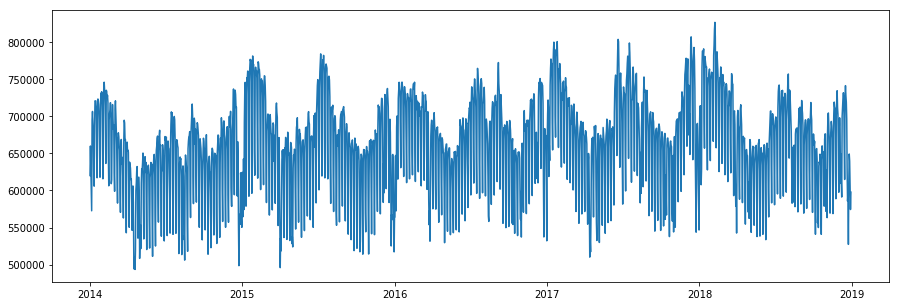

In [15]:
plt.figure(figsize=(15,5))
plt.plot(data['energy'])

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


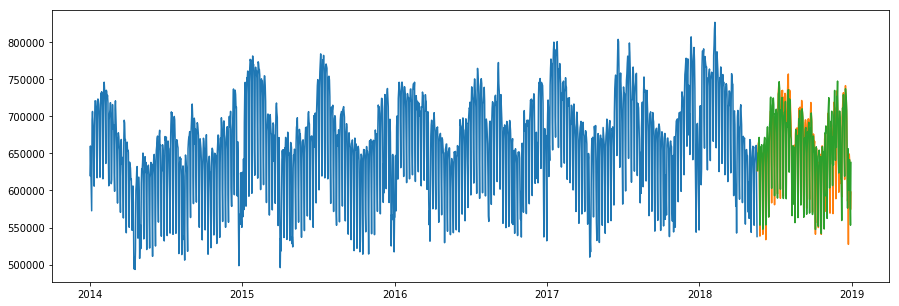

In [18]:
#for plotting
train = data[:1600]
valid = data[1600:]
plt.figure(figsize=(15,5))
valid['Predictions'] = e_demand
plt.plot(train['energy'])
plt.plot(valid[['energy','Predictions']])

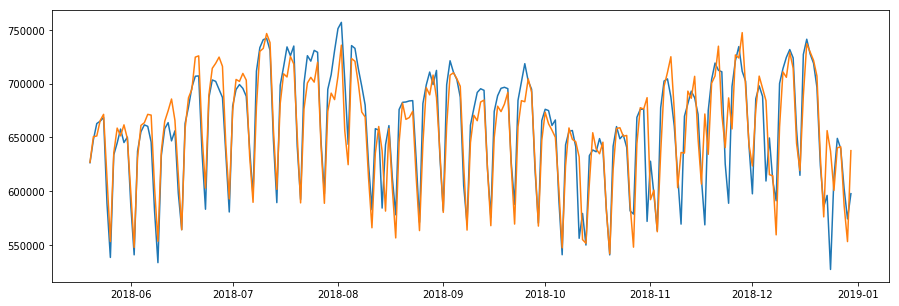

In [19]:
plt.figure(figsize=(15,5))
plt.plot(valid[['energy','Predictions']])

In [20]:
difdf = valid[['energy','Predictions']]

In [21]:
difdf 

,energy,Predictions
date,,
2018-05-20,626483.5,626961.3125
2018-05-21,647879.1,650676.8750
2018-05-22,662885.7,651326.3750
2018-05-23,665091.2,665699.0625
2018-05-24,668553.0,671426.5000
2018-05-25,588711.7,611895.4375
2018-05-26,538444.8,553229.5000
2018-05-27,633780.0,635693.4375
2018-05-28,644807.6,658653.7500
